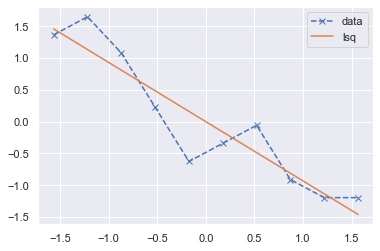

In [100]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sps

sns.set()

def standardize(x):
    return (x - x.mean()) / x.std()

# simulated data
growth_rates = standardize(np.array([2.0,2.1,1.9,1.6,1.3,1.4,1.5,1.2,1.1,1.1]))
x = standardize(np.arange(len(growth_rates)))

slope,intercept,_,_,_ = sps.linregress(x=x,y=growth_rates)

least_squares_lines = np.array([X[i] * slope + intercept for i in range(len(X))])

_ = plt.plot(x,growth_rates,'x--',label='data')
_ = plt.plot(X,least_squares_lines,label='lsq')
_ = plt.legend(loc='upper right')

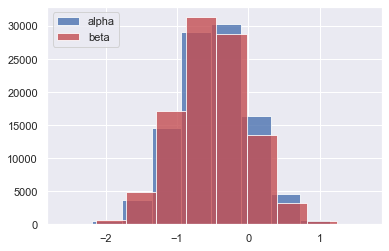

In [101]:
# figure out priors by simulating data

size = 100000
alpha_sigma = 0.5
beta_sigma = 0.5
alpha = pm.rnormal(mu=-0.5,tau=1 / alpha_sigma ** 2,size=size)
beta = pm.rnormal(mu= -0.5,tau=1 / beta_sigma ** 2,size=size)

plt.hist(alpha,color='b',label='alpha',alpha=0.8)
plt.hist(beta,color='r',label='beta',alpha=0.8)
plt.legend(loc='upper left')

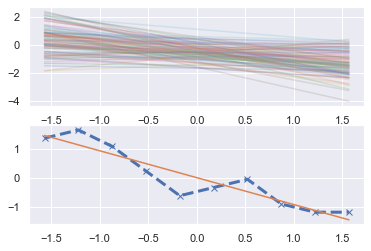

In [102]:
# sample from simulated posterior to see if priors are ok

rows = 100
points = 8
alpha_samples = np.random.choice(alpha,replace=True,size=rows)
beta_samples = np.random.choice(beta,replace=True,size=rows)

X = np.linspace(x.min(),x.max(),points)

lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])

plt.subplot(211)
_ = plt.plot(X,lines,alpha=0.2)

plt.subplot(212)
_= plt.plot(x,growth_rates,'x--',label='data',lw=3)
_ = plt.plot(X,least_squares_lines,label='lsq')
